# Cat Detector ML Model
We use Logistic Regression to create a Neural Network which identifies if an image is of cat or not.

In [21]:
# all the imports

import numpy as np
import copy
import matplotlib.pyplot as plt
from PIL import Image
import random

from data.load_data import load_dataset as data

In [44]:
# loading data

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = data()

m_train =  train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1] # dimension of images

# DOCS
# Here train_set_x_orig is set of m rgb images (a x b x 3)
# Here train_set_y is set of m labels corresponding to each image

# tests are defined similarly

print(f"Number of images in X train is {train_set_x_orig.shape[0]} and each image is {train_set_x_orig.shape[1]} x {train_set_x_orig.shape[2]} x {train_set_x_orig.shape[3]} array." )
print(f"Number of labels in Y train is {train_set_y.shape[1]} each being 0 (not cat) or 1 (cat).")

Number of images in X train is 209 and each image is 64 x 64 x 3 array.
Number of labels in Y train is 209 each being 0 (not cat) or 1 (cat).


Now, let's try to look at an example from the training dataset as follows

This is labelled as 1


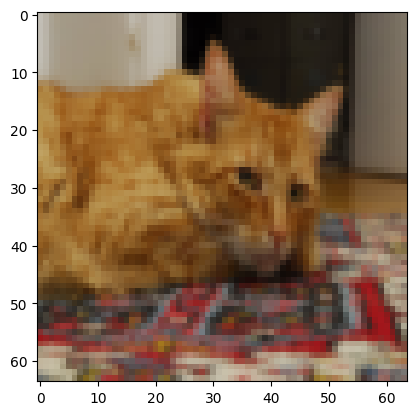

In [68]:
image_index = random.randint(1, m_train) # from 1 to 209 (incl.)

plt.imshow(train_set_x_orig[image_index])
print(f"This is labelled as {train_set_y[0][image_index]}")

We now want to reshape our training images X to a vector which will be our input to the NN.

In [74]:
train_set_x_vector = train_set_x_orig.reshape(m_train, num_px*num_px*3).T
test_set_x_vector = test_set_x_orig.reshape(m_test, num_px*num_px*3).T

print(f"New shape of training set is {train_set_x_vector.shape}")
print(f"New shape of test set is {test_set_x_vector.shape}")

# Standarize it
train_x = train_set_x_vector/255
test_x = test_set_x_vector/255

New shape of training set is (12288, 209)
New shape of test set is (12288, 50)


In [75]:
# Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# init weights at 0
# dim is number of features in input i.e., 12288 in our case
def init_weights(dim):
    w = np.zeros((dim , 1), dtype=float)
    b = 0.0
    return w , b

In [81]:
# For a given set of weights and training set, this method returns the current cost J(w,b)
# and current gradient vectors dJ/dw and dJ.db
def propogate(w,b,X,Y):
    m = X.shape[1] # number of training data points
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m

    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [82]:
# This method improves our weights by gradient descent
def grad_desc(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    
    costs = []
    for i in range (num_iterations):
        grads, cost = propogate(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        if i%100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after {i} iterations is {cost}")
    
    # After all iterations, we return the weights and cost history (for plotting purpose)
    params = {"w": w,
              "b": b}
    
    return params, costs

In [83]:
# This method predicts the output i.e., cat or not cat
def predict(w,b,X, threshold = 0.5):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(m):
        if A[0][i] > threshold:
            Y_prediction[0][i] = 1

    return Y_prediction

In [84]:
# This is our final model
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
   
    w, b = init_weights(X_train.shape[0])

    params, costs = grad_desc(w, b, X_train, Y_train, num_iterations, learning_rate, True)
    
    w = params["w"]
    b = params["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Running the Model

In [85]:
logistic_regression_model = model(train_x, train_set_y, test_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after 0 iterations is 0.6931471805599453
Cost after 100 iterations is 0.5845083636993086
Cost after 200 iterations is 0.46694904094655476
Cost after 300 iterations is 0.37600686694802077
Cost after 400 iterations is 0.33146328932825125
Cost after 500 iterations is 0.30327306747438293
Cost after 600 iterations is 0.27987958658260487
Cost after 700 iterations is 0.2600421369258757
Cost after 800 iterations is 0.2429406846779662
Cost after 900 iterations is 0.2280042225672607
Cost after 1000 iterations is 0.2148195137844964
Cost after 1100 iterations is 0.20307819060644985
Cost after 1200 iterations is 0.19254427716706857
Cost after 1300 iterations is 0.18303333796883506
Cost after 1400 iterations is 0.17439859438448876
Cost after 1500 iterations is 0.1665213970540033
Cost after 1600 iterations is 0.15930451829756614
Cost after 1700 iterations is 0.15266732471296507
Cost after 1800 iterations is 0.14654223503982342
Cost after 1900 iterations is 0.1408720757031016
train accuracy: 99.0

Now that our model is trained, we can start using it!
# Statistical Data

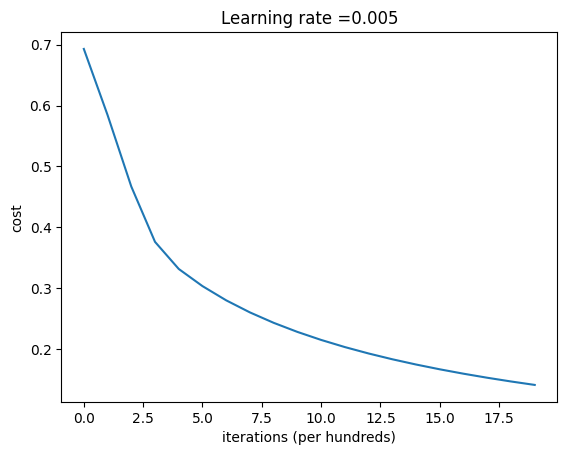

In [87]:
plt.plot(logistic_regression_model['costs'])
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

# Testing with our own images

In [89]:
# Method for testing
def test_image(filepath):
    # We preprocess the image to fit the algorithm.
    image = np.array(Image.open(filepath).resize((num_px, num_px)))
    plt.imshow(image)

    # processing image data
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T

    # running on model weights
    prediction = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

    if (prediction == 0):
        print("Model thinks this is not a cat")
    else:
        print("Model thinks this is a cat")

### Test 1

Model thinks this is not a cat


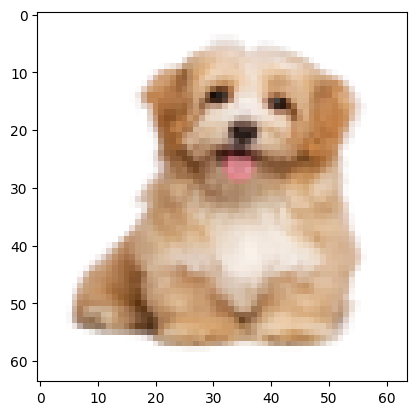

In [90]:
# change this to the name of your image file
my_image = "./test/dog.webp"
test_image(my_image)

### Test 2

Model thinks this is a cat


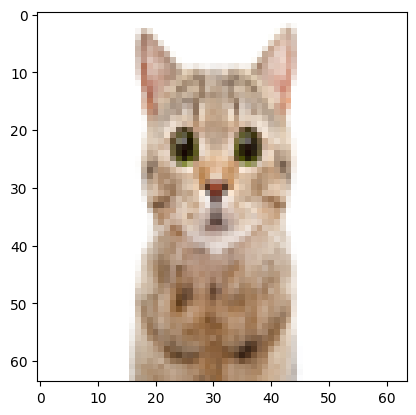

In [91]:
# change this to the name of your image file
my_image = "./test/cat.jpg"
test_image(my_image)